<a href="https://www.kaggle.com/code/ahmad24kky/university-vocational-school-admission-in-russia?scriptVersionId=248227170" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/ahmad24kky/university-vocational-school-admission-in-russia?scriptVersionId=226937121" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# University and Vocational school Admission in Russia project Analyst

## Business Questions

* Group of professions with smallest acceptance rate every year based on Education level
* Most favorite Group of Professions in every Education level based on Number of Applications
* Percentage Number of Students by Branches of Science
* Most consistent Branches of Science based on Percentage Increase



## Import Library


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing Data

### Import dataset

In [2]:
df=pd.read_csv('/kaggle/input/university-admission-in-russia-2014-2023/University and vocational schools admission in Russia 2014-2023.csv',sep=';')

df.head(5)

,Index,Education level,Degree,Tuition fees,ID,Branches of Science,Group of Professions,Year,Number of Applications,Number of Students
0,1,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Mathematics and Mechanics,2014,47923.0,7144.0
1,2,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Computer Science,2014,28787.0,3238.0
2,3,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Physics and Astronomy,2014,23906.0,4391.0
3,4,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Chemistry,2014,25930.0,2367.0
4,5,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Earth Science,2014,43434.0,6745.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   5568 non-null   int64  
 1   Education level         5568 non-null   object 
 2   Degree                  5568 non-null   object 
 3   Tuition fees            5568 non-null   object 
 4   ID                      5568 non-null   int64  
 5   Branches of Science     5568 non-null   object 
 6   Group of Professions    5568 non-null   object 
 7   Year                    5568 non-null   int64  
 8   Number of Applications  5016 non-null   float64
 9   Number of Students      5472 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 435.1+ KB


In [4]:
df.isna().sum()

Index                       0
Education level             0
Degree                      0
Tuition fees                0
ID                          0
Branches of Science         0
Group of Professions        0
Year                        0
Number of Applications    552
Number of Students         96
dtype: int64

In [5]:
df = df.dropna().loc[~(df == 0).any(
    axis=1)].reset_index(drop=True)

## Exploratory Data Analysis (EDA)

### Group of professions with smallest acceptance rate every year based on Education level


In [6]:
acceptance_rate = df['Number of Students'] / df['Number of Applications'] * 100
df['Acceptance Rate'] = acceptance_rate

higher_education = df.loc[df['Education level'] == "Higher Education"]

higher_education = higher_education.loc[higher_education.groupby(
    'Year')['Acceptance Rate'].idxmin()]

higher_education = {
    "Group of Professions": higher_education['Group of Professions'],
    "Year": higher_education['Year'],
    "Acceptance Rate (In Percent)": higher_education['Acceptance Rate']}
higher_education = pd.DataFrame(higher_education)
pd.DataFrame(higher_education).reset_index(drop=True)

,Group of Professions,Year,Acceptance Rate (In Percent)
0,Economics and Management,2014,2.235050
1,Economics and Management,2015,2.297827
2,"Photonics, Instrument Engineering, Optical and...",2016,3.987730
3,Physics and Technical Sciences and Technologies,2017,2.083333
4,Nanotechnology,2018,2.449889
5,Physics and Technical Sciences and Technologies,2019,3.636364
6,Physics and Technical Sciences and Technologies,2020,0.909091
7,Nanotechnology,2021,2.249806
8,Chemical Technologies,2022,1.004016
9,Chemical Technologies,2023,0.806452


In [7]:
acceptance_rate = df['Number of Students'] / df['Number of Applications'] * 100
df['Acceptance Rate'] = acceptance_rate

vocational_education = df.loc[df['Education level'] == "Vocational Education"]


vocational_education = vocational_education.loc[vocational_education.groupby(
    'Year')['Acceptance Rate'].idxmin()]

vocational_education = {
    "Group of Professions": vocational_education['Group of Professions'],
    "Year": vocational_education['Year'],
    "Acceptance Rate (In Percent)": vocational_education['Acceptance Rate']}
vocational_education = pd.DataFrame(vocational_education)

pd.DataFrame(vocational_education).reset_index(drop=True)

,Group of Professions,Year,Acceptance Rate (In Percent)
0,Pharmacy,2014,9.882184
1,Pharmacy,2015,9.127860
2,Art History,2016,4.255319
3,Pharmacy,2017,18.845432
4,Health Sciences and Preventive Healthcare,2018,7.692308
5,Pharmacy,2019,13.989554
6,Pharmacy,2020,10.875535
7,Pharmacy,2021,14.061156
8,Pharmacy,2022,13.289455
9,Mass Media and Information,2023,11.111111


### Most favorite Branches of Science and Group of Professions in every Education level based on Number of Applications


In [8]:

question_2 = df.groupby(by=["Education level", "Group of Professions"]).agg({
    "Number of Applications": "sum"}).reset_index()

pd.DataFrame(question_2).nlargest(
    10, "Number of Applications").reset_index(drop=True)

,Education level,Group of Professions,Number of Applications
0,Higher Education,Economics and Management,10318652.0
1,Higher Education,Education Sciences and Pedagogy,5889276.0
2,Higher Education,Information Technology,4613268.0
3,Higher Education,Jurisprudence,4163021.0
4,Higher Education,Clinical Medicine,3804193.0
5,Vocational Education,Information Technology,2026742.0
6,Higher Education,Linguistics and Philology,1911232.0
7,Vocational Education,Economics and Management,1858111.0
8,Vocational Education,Transport Equipment and Technologies,1793869.0
9,Higher Education,Mechanical Engineering,1698315.0


### Percentage Number of Students by Branches of Science


In [9]:
question_3 = df.groupby(by=["Branches of Science"]).agg({
    "Number of Students": "sum"}).reset_index()

question_3["Percentage"] = question_3['Number of Students'] * 100 / \
    question_3['Number of Students'].sum()

question_3['Percentage'] = question_3['Percentage'].round(2)

pd.DataFrame(question_3).sort_values(
    by="Number of Students", ascending=False).reset_index(drop=True)

,Branches of Science,Number of Students,Percentage
0,Engineering and Technology,7803710.0,39.52
1,Social Sciences,5866999.0,29.71
2,Education Sciences and Pedagogy,1621734.0,8.21
3,Healthcare and Medicine,1542049.0,7.81
4,Agriculture,979138.0,4.96
5,Humanities,695243.0,3.52
6,Arts and Culture,692177.0,3.51
7,Mathematical and Natural Sciences,532301.0,2.70
8,Oriental and African Studies,11984.0,0.06
9,Military Science,111.0,0.00


### Most consistent Branches of Science based on Percentage Increase


In [10]:
question_4 = df.groupby(by=["Year", "Branches of Science",]).agg({
    "Number of Applications": "sum",
}).reset_index()
question_4["Percentage Increase"] = question_4.groupby(
    'Branches of Science')['Number of Applications'].pct_change().fillna(0) * 100

question_4["Percentage Increase"] = question_4["Percentage Increase"].round(2)

pd.DataFrame(question_4)

,Year,Branches of Science,Number of Applications,Percentage Increase
0,2014,Agriculture,165714.0,0.00
1,2014,Arts and Culture,139690.0,0.00
2,2014,Education Sciences and Pedagogy,518025.0,0.00
3,2014,Engineering and Technology,1841400.0,0.00
4,2014,Healthcare and Medicine,552457.0,0.00
...,...,...,...,...
90,2023,Humanities,555073.0,8.30
91,2023,Mathematical and Natural Sciences,525758.0,9.10
92,2023,Military Science,125.0,-23.31
93,2023,Oriental and African Studies,25066.0,8.98


## Data Visualization

### Group of professions with smallest acceptance rate every year based on Education level


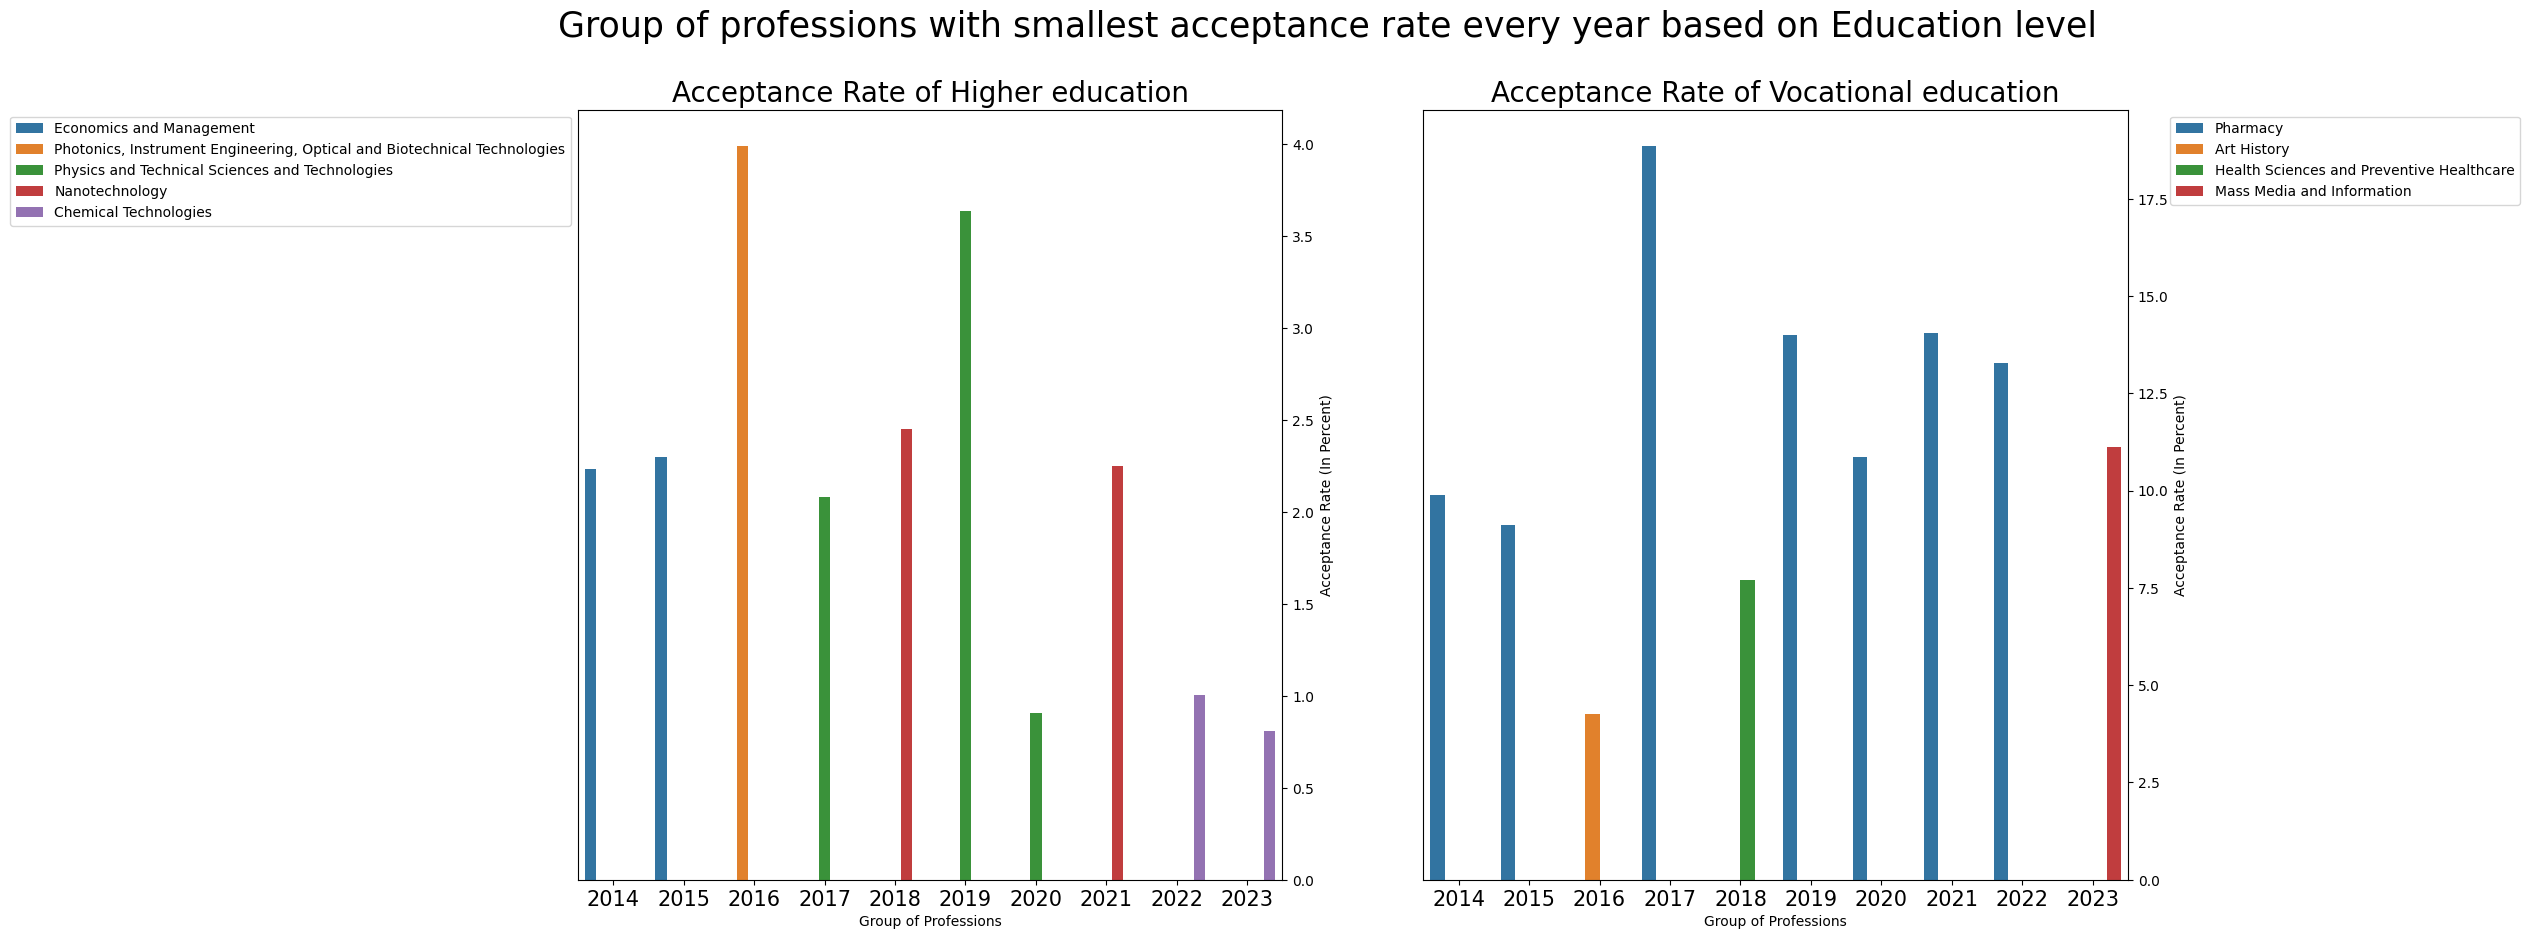

In [11]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=1, ncols=2)
sns.barplot(data=higher_education, y="Acceptance Rate (In Percent)", x="Year",
            hue="Group of Professions", errorbar=None, ax=ax[0])
ax[0].set_xlabel("Group of Professions")
ax[0].set_ylabel("Acceptance Rate (In Percent)")
ax[0].yaxis.set_label_position("right")
ax[0].yaxis.tick_right()
ax[0].set_title("Acceptance Rate of Higher education",
                loc="center", fontsize=20)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].legend(loc='upper right', bbox_to_anchor=(0, 1))

sns.barplot(data=vocational_education, y="Acceptance Rate (In Percent)", x="Year",
            hue="Group of Professions", errorbar=None, ax=ax[1])
ax[1].set_xlabel("Group of Professions")
ax[1].set_ylabel("Acceptance Rate (In Percent)")
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Acceptance Rate of Vocational education",
                loc="center", fontsize=20)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.suptitle(
    "Group of professions with smallest acceptance rate every year based on Education level", fontsize=25)
plt.show(fig)

### Most favorite Group of Professions in every Education level based on Number of Applications


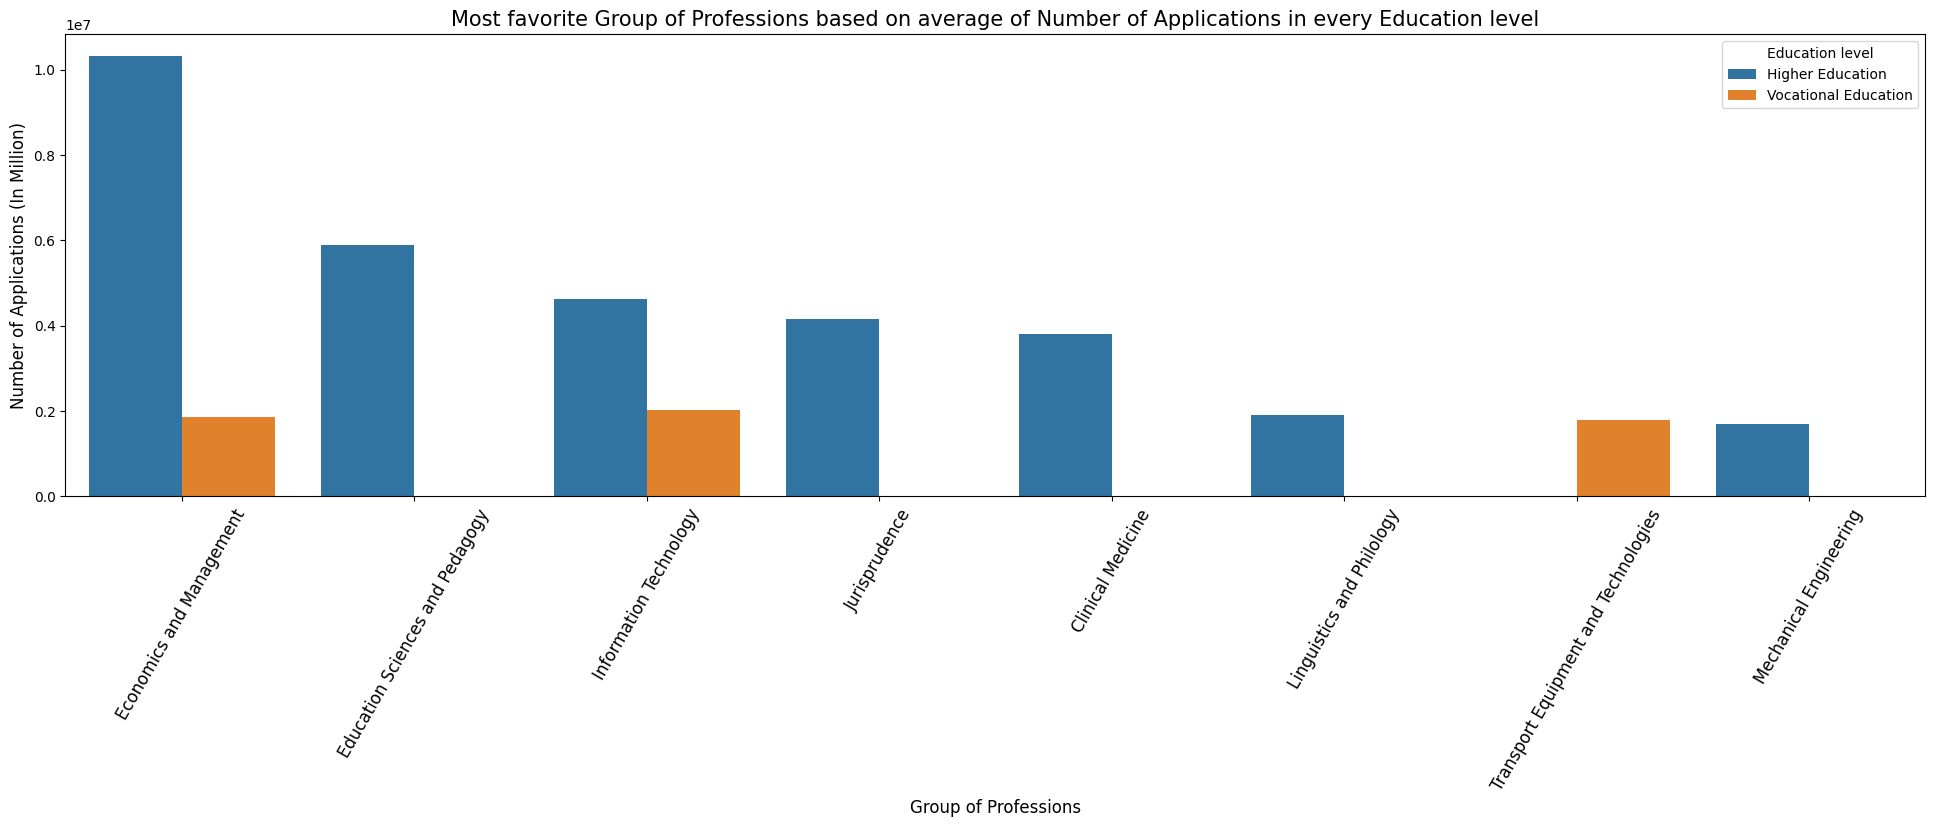

In [12]:
fig, ax = plt.subplots(figsize=(24, 6))
sns.barplot(data=question_2.sort_values(by="Number of Applications", ascending=False).head(10),
            x="Group of Professions", y="Number of Applications", errorbar=None, hue="Education level")
ax.set_ylabel("Number of Applications (In Million)", fontsize=12)
ax.set_xlabel("Group of Professions", fontsize=12)
ax.set_title("Most favorite Group of Professions based on average of Number of Applications in every Education level",
             loc="center", fontsize=15)
ax.tick_params(axis='x', rotation=60, labelsize=12)

plt.show(fig)

### Percentage Number of Students by Branches of Science


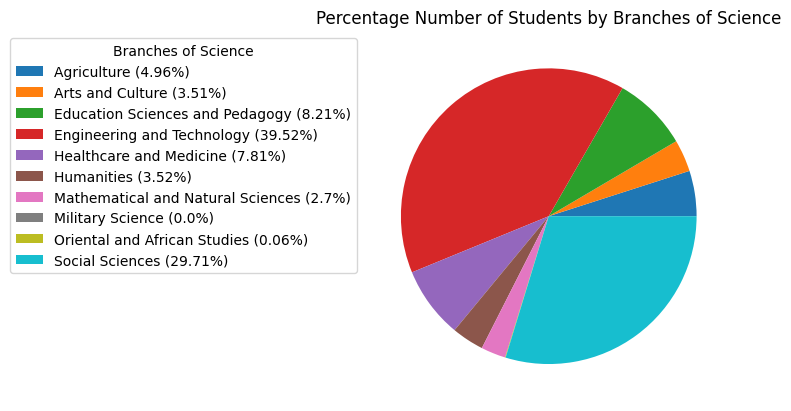

In [13]:
plt.pie(question_3['Number of Students'],
        labels=None,
        )
labels_legend = [f"{j} ({p}%)" for j, p in zip(
    question_3['Branches of Science'], question_3['Percentage'])]
plt.legend(title="Branches of Science",
           labels=labels_legend,
           loc="best",
           bbox_to_anchor=(0, 0, 0, 1))
plt.title("Percentage Number of Students by Branches of Science")
plt.show()

### Most consistent Branches of Science based on Percentage Increase


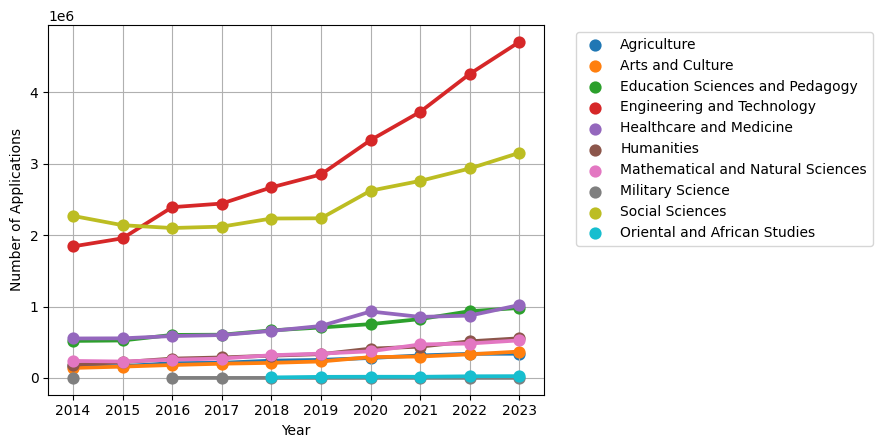

In [14]:

sns.pointplot(question_4, x=question_4['Year'],
              y=question_4['Number of Applications'], hue=question_4['Branches of Science'])
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

## Conclusion

### Group of professions with smallest acceptance rate every year based on Education level
#### Higher Education

* Economics and Management in 2014 and 2015
* Photonics, Instrument Engineering, Optical and Biotechnical Technologies in 2016
* Physics and Technical Sciences and Technologies in 2017,2019 and 2020
* Nanotechnology in 2018 and 2021
* Chemical Technologies	in 2022 and 2023

#### Vocational education


* Pharmacy in 2014,2015,2017,2019,2020,2021 and 2022
* Art History in 2016
* Health Sciences and Preventive Healthcare in 2018
* Mass Media and Information in 2023

### Most favorite Group of Professions in every Education level based on Number of Applications
* Higher Education :
    - Economics and Management with 10.318.652 Applications
    - Education Sciences and Pedagogy with 5.889.276 Applications
    - Information Technology with 4.613.268 Applications
    - Jurisprudence	 with 4.163.021 Applications
    - Clinical Medicine with 3.804.193 Applications
    - Linguistics and Philology	 with 1.911.232 Applications
    - Mechanical Engineering with 1.698.315 Applications
* Vocational Education :
    - Information Technology with 2.026.742 Applications
    - Economics and Management with 1.858.111 Applications
    - Transport Equipment and Technologies with 1.793.869 Applications

### Percentage Number of Students by Branches of Science
* Engineering and Technology 39.52%
* Social Sciences 29.71%
* Education Sciences and Pedagogy 8.21%
* Healthcare and Medicine 7.81%
* Agriculture 4.96%
* Humanities 3.52%
* Arts and Culture 3.51%
* Mathematical and Natural Sciences 2.7%
* Oriental and African Studies 0.06%
* Military Science 0.00%

    Note : Military Science have Students but amount of all the students not reach 0.01%

### Most consistent Branches of Science based on Percentage Increase

* Arts and Culture,Education Sciences and Pedagogy,Engineering and Technology, and Humanities are the Branches of Science with most consistent increase